KNN的原理：  
https://windmising.gitbook.io/liu-yu-bo-play-with-machine-learning/di-si-zhangkjin-lin-suan-fa

In [1]:
import numpy as np
import kNN
import utils

# 一个简单的人造数据

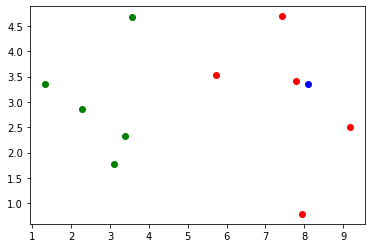

In [2]:
train_X, train_y, test_X = utils.createDataSet()
utils.plotData(train_X, train_y, test_X)

Expect Result: 绿点为类0，红点为类1，蓝点为待预测的点

In [3]:
kNN.classify0(test_X, train_X, train_y, 3)

array([1])

Expect Result: [1]

# Dating Test

In [4]:
datingDataMat,datingLabels = utils.file2matrix('datingTestSet2.txt')  

Expect Result:  

书上此处有误，应使用datingTestSet2.txt，而不是datingTestSet.txt  
datingDataMat.shape = [m, 3]  
3个特征依次为：  
0 - Frequent flier miles  
1 - Percentage of time spent playing video games  
2 - Liters of ice cream consumed weekly  
datingLabels包含三个分类，label分别是1，2，3

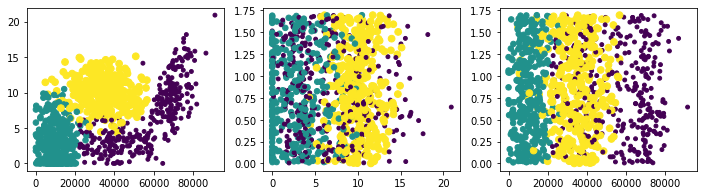

In [5]:
utils.plotDatingData(datingDataMat,datingLabels)

Expect Result:  
对datingDataMat的3个特征，任意取两个分别作为横纵坐标，按分类画出此图。

从图中可以看书，datingDataMat的三个特征差别非常大，因此需要对数据做[归一化](https://windmising.gitbook.io/liu-yu-bo-play-with-machine-learning/di-si-zhangkjin-lin-suan-fa/4-7)

In [6]:
normMat, ranges, minVals = utils.autoNorm(datingDataMat)
print ("ranges = ", ranges)
print ("minVals = ", minVals)

ranges =  [9.1273000e+04 2.0919349e+01 1.6943610e+00]
minVals =  [0.       0.       0.001156]


Expect Result:

ranges =  [9.1273000e+04 2.0919349e+01 1.6943610e+00]  
minVals =  [0.       0.       0.001156]  

normMat中的数值全部在[0,1]范围内。  
ranges分别为原始数据中三个特征的最大值最小值之差。  
minVals分别为原始数据中三个特征的最小值。  
ranges和minVals用于对新的样本做归一化。

In [7]:
testRatio = 0.1
train_X, train_y, test_X, test_y = utils.splitTrainAndTest(normMat, datingLabels, testRatio) 
predict_y = kNN.classify0(test_X, train_X, train_y, 3)
accuracy = utils.calculateAccuray(predict_y, test_y)
print ("accuracy = ", accuracy)

accuracy =  0.95


Expect Result:  

accuracy =  0.95

全部数据中，前10%作为测试集，后10%作为训练集  
test_y为测试集的真实标签，predict_y为测试集的预测标签

# 对任意Dating数据的预测

这段代码对自动化运行不友好，因此将其注释。

In [8]:
# datingDataMat,datingLabels = utils.file2matrix('datingTestSet2.txt')
# normMat, ranges, minVals = utils.autoNorm(datingDataMat)

In [9]:
# percentTats = float(input(\
#     "percentage of time spent playing video games?"))
# ffMiles = float(input("frequent flier miles earned per year?"))
# iceCream = float(input("liters of ice cream consumed per year?"))
# inX = utils.preprocessForTestData(ffMiles, percentTats, iceCream, ranges, minVals)

In [10]:
# classifierResult = kNN.classify0(inX,  # 对测试用例标准化
#                                  normMat,                   # 使用标准化之后的样本
#                                  datingLabels, 3)
# print ("You will probably like this person: ",utils.labelId2Text(classifierResult[0]))

# 手写数字识别

In [11]:
train_X, train_y = utils.downloadHandWritingData("trainingDigits")
test_X, test_y = utils.downloadHandWritingData("testDigits")

Expect Result:  
train_X, train_y分别为训练集的特征和标签。  
test_X, test_y分别为测试集的特征和标签。  
特征数据包含1024个特征，为图像的1024个像素值。  
标签分为10个类别，分别是0-9。  

In [15]:
predict_y = kNN.classify0(test_X, train_X, train_y, 3)
accuracy = utils.calculateAccuray(predict_y, test_y)
print ("accuracy = ", accuracy)

accuracy =  0.9894291754756871


Expect Result:  
accuracy =  0.9894291754756871